## Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [397]:
# Cargamos librerias que necesitamos

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# librerias para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [399]:
# datos en python con variable Analisis

Analisis = pd.read_csv('C:/Users/PC/Desktop/bases/DatasetRegresiónLogística/heart_cleveland_upload.csv')

In [401]:
# analisis exploratorio

Analisis.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [403]:
# descripcion de analisis

Analisis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [405]:
#Revisión del tipo de datos y datos faltantes

Analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
### Característica de interes:

###### Cardiaca: si la persona tiene Cardiaca o no (0 = no  es Cardiaca - 1 = si es Cardiaca)
###### Predecir si una persona puede ser Cardiaca

In [409]:
# Total de personas cardiacas

Analisis['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

## Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [413]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Analisis.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = Analisis['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [415]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [417]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

## Entrenar el modelo configurando los diferentes hiperparámetros

In [419]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [421]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2


In [423]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


## Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [425]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



## Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

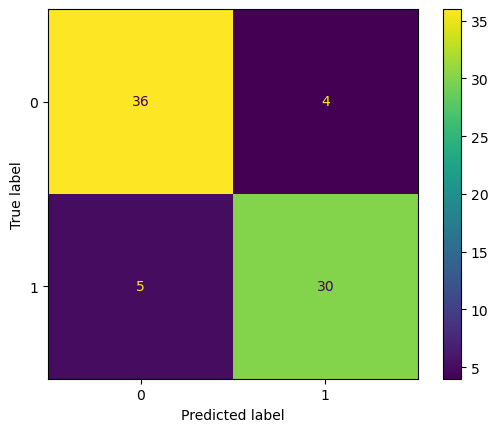

In [427]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

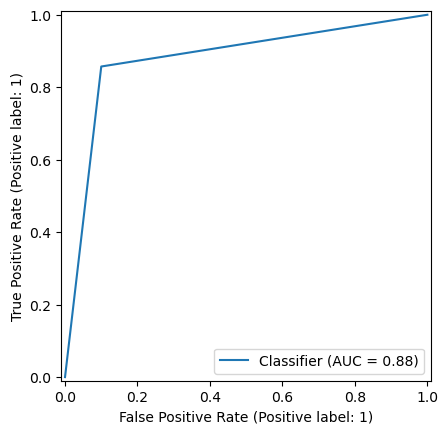

In [429]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

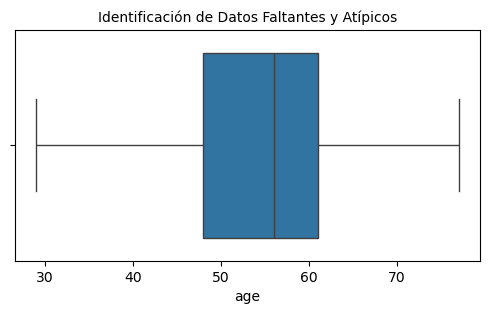

In [431]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['age']) # edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

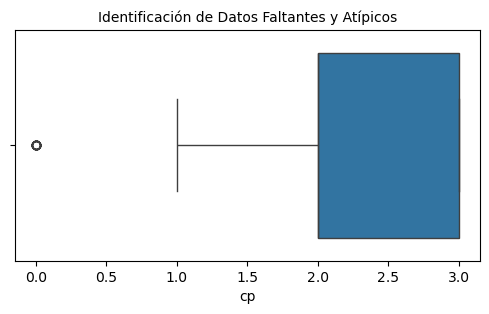

In [433]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['cp']) # tipo de dolor en el pecho
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

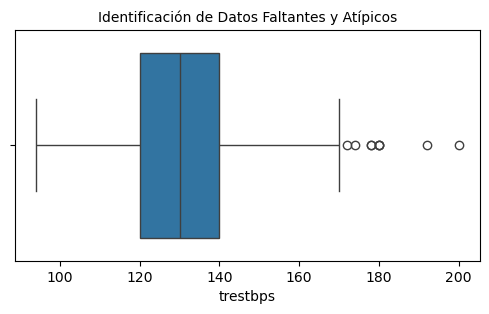

In [435]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['trestbps']) # presión arterial en reposo
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

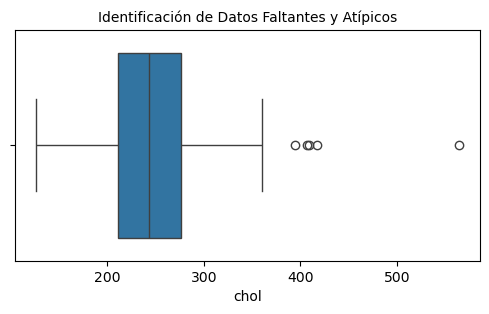

In [437]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['chol']) # colesterol sérico
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

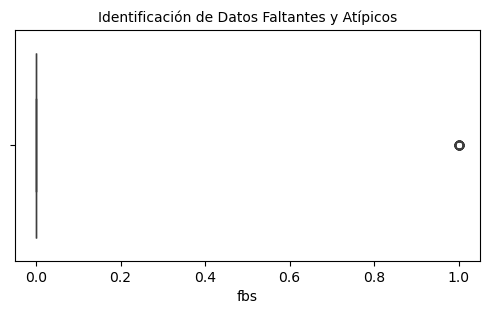

In [439]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['fbs']) #  glucemia en ayunas
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

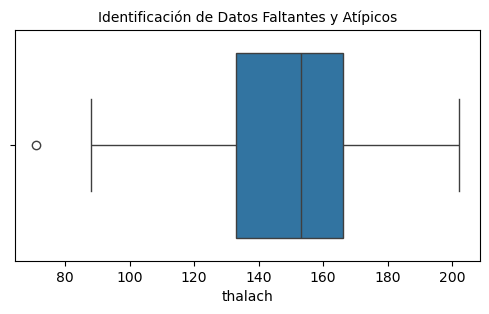

In [441]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['thalach']) # frecuencia cardíaca máxima alcanzada
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

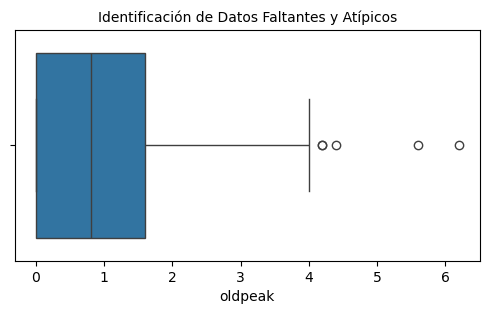

In [443]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['oldpeak']) # depresión del ST inducida por el ejercicio
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

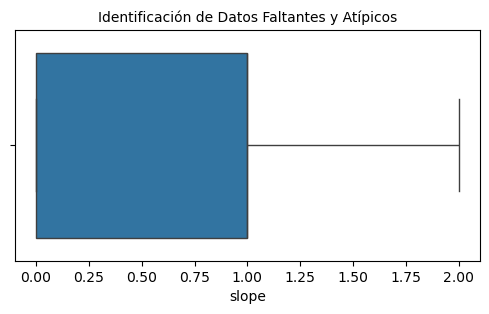

In [445]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['slope']) #  pendiente del segmento ST en el ECG
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

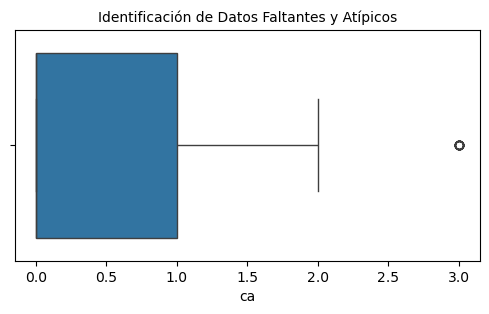

In [447]:
# identificacion de datos faltantes y atipicos 

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['ca']) # número de vasos principales coloreados por fluoroscopía
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [451]:
# Revisión de faltantes 

print("Cantidad de Registros con cero en Tipo de Dolor en el Pecho: ",Analisis['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en genero: ",Analisis['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en glucemia en ayunas: ",Analisis['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en angina inducida por el ejercicio: ",Analisis['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en pendiente del segmento ST en el ECG: ",Analisis['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en  número de vasos principales coloreados por fluoroscopía: ",Analisis['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en talasemia: ",Analisis['thal'].isin([0]).sum())


Cantidad de Registros con cero en Tipo de Dolor en el Pecho:  23
Cantidad de Registros con cero en genero:  96
Cantidad de Registros con cero en glucemia en ayunas:  254
Cantidad de Registros con cero en angina inducida por el ejercicio:  200
Cantidad de Registros con cero en pendiente del segmento ST en el ECG:  139
Cantidad de Registros con cero en  número de vasos principales coloreados por fluoroscopía:  174
Cantidad de Registros con cero en talasemia:  164


In [453]:
# Reemplazamos todos los ceros con el valor medio (promedio) de la columna.

Analisis['cp']=Analisis['cp'].replace(0,Analisis['cp'].mean())
Analisis['sex']=Analisis['sex'].replace(0,Analisis['sex'].mean())
Analisis['fbs']=Analisis['fbs'].replace(0,Analisis['fbs'].mean())
Analisis['exang']=Analisis['exang'].replace(0,Analisis['exang'].mean())
Analisis['slope']=Analisis['slope'].replace(0,Analisis['slope'].mean())
Analisis['ca']=Analisis['ca'].replace(0,Analisis['ca'].mean())
Analisis['thal']=Analisis['thal'].replace(0,Analisis['thal'].mean())

In [455]:
# Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Tipo de Dolor en el Pecho: ",Analisis['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en genero: ",Analisis['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en glucemia en ayunas: ",Analisis['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en angina inducida por el ejercicio: ",Analisis['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en pendiente del segmento ST en el ECG: ",Analisis['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en  número de vasos principales coloreados por fluoroscopía: ",Analisis['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en talasemia: ",Analisis['thal'].isin([0]).sum())


Cantidad de Registros con cero en Tipo de Dolor en el Pecho:  0
Cantidad de Registros con cero en genero:  0
Cantidad de Registros con cero en glucemia en ayunas:  0
Cantidad de Registros con cero en angina inducida por el ejercicio:  0
Cantidad de Registros con cero en pendiente del segmento ST en el ECG:  0
Cantidad de Registros con cero en  número de vasos principales coloreados por fluoroscopía:  0
Cantidad de Registros con cero en talasemia:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

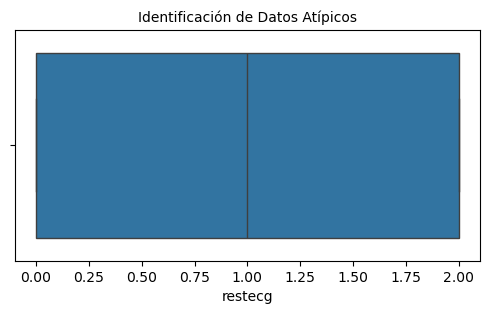

In [457]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Analisis['restecg'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [459]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=1000
Total_Atipicos=((Analisis['restecg']<nivel_minimo)|(Analisis['restecg']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 297


In [461]:
# Filtra Datos Atípicos

Analisis=Analisis[(Analisis['restecg']<nivel_maximo)&(Analisis['restecg']>nivel_minimo)]

In [463]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Analisis['restecg']<nivel_minimo)|(Analisis['restecg']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


## 8. Interpretar, analizar y documentar los resultados obtenidos

###### **Del desempeño del modelo se puede describir:**

###### - Precision: Podemos decir que el 88% de las personas tiene presencia de enfermedad cardíaca. 
###### - Recall: Se observa que el 90% de las personas no son cardiacos y el 86% presentan la enfermedad cardiaca
###### - F1- Score: Podemos observar que los dos calculos son valores altos elcual indica que es alta la tasa de enfermedades cardicas

###### **De la Matriz de Confusión podemos interpretar:**

###### Verdaderos positivos 30 de las personas enfermedades cardiacas
###### Verdaderos negativos 36 de las personas que no son cardiacos
###### Falsos positivos 4  de las personas enfermedades cardiacas
###### Falsos negativos 5 de las personas que no son cardiacos

###### **De la curva de precisión del modelo se puede interpretar:**

###### Optimizar el umbrel de clasificacion de falsos negativos, indica un balance y detecta el verdadero positivo en las personas con enfermedades cardiacas tiene un AUC de 0.88 quivale a un 88%
